In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

In [2]:
#интерполяционный многочлен по опрделению
def int_polinom (xmas,ymas):
    n = xmas.shape[0]
    xmat = np.zeros((n,n)) 
    for i in range(n):
        for j in range(n):
            xmat[i,j] = x[i]**j
    res = LA.solve(xmat,ymas)
    return res

# Задача 3.1

In [3]:
A = np.array([[(np.sin(i+1))**(20-j) for j in range(5) ] for i in range(5)])


In [4]:
def LU_matrix(matA):
    matU = np.copy(matA)
    n = matA.shape[0]
    matL = np.eye(n)  #объявляем L единичной матрицей
    for j in range(0,n,1):
        for i in range(j+1,n,1):
        #заполняем L коэффициентами по столбцам
            matL[i][j]=matU[i][j]/matU[j][j]
        #зануляем столбцы, вычитая строки, 
        #умноженные на коэффициенты
            matU[i] -= matU[j]*matU[i][j]/matU[j][j]
    return matL,matU

In [5]:
np.set_printoptions(precision=15)
#с помощью обратных матриц
def LU_solve(matA, vecB):
    vecY=np.zeros(matA.shape[0])
    vecX=np.zeros(matA.shape[0])
    
    LUmas=LU_matrix(matA)
    
    matL=LUmas[0]
    matU=LUmas[1]
    
    invL=np.linalg.inv(matL)
    invU=np.linalg.inv(matU)
   
    vecX=invU @ invL @ vecB
    print(vecX)
    return vecX

#c помощью доп вектора
def LU_solve1(matA, vecB):
    vecY=np.zeros(matA.shape[0])
    vecX=np.zeros(matA.shape[0])
    vecC=np.copy(vecB)
    
    LUmas=LU_matrix(matA)
    n=matA.shape[0]
    matL=LUmas[0]
    matU=LUmas[1]
    
    #LUX=С UX=Y 
    for i in range (0,n,1):
        vecY[i]=vecC[i]/matL[i][i]
        for k in range(i+1,n,1):
                vecC[k]-=vecY[i]*matL[k][i] 
                
    #решаем систему LY=b          
    for i in range (n-1,-1,-1):
        vecX[i]=vecY[i]/matU[i][i]
        for k in range(i-1,-1,-1):
            vecY[k]-=vecX[i]*matU[k][i]

    return vecX

Xvec=np.array([2.26, 532.454, 5.24, 2.4, 2.35 ])
print(Xvec)

Bvec=A @ Xvec
print(Bvec)

LU_solve(A,Bvec)
LU_solve1(A,Bvec)



[  2.26  532.454   5.24    2.4     2.35 ]
[ 2.062804905434415e+01  8.971076553139990e+01  1.061473285339509e-13
 -2.623182157030123e+00 -2.365204456022973e+02]
[  2.260000000003231 532.454000000002      5.23999999999927
   2.399999999999693   2.350000000000108]


array([  2.259999999999965, 532.4540000000002  ,   5.239999999999987,
         2.399999999999872,   2.350000000000018])

In [6]:
B=np.array([[1.0,2.0, 3.0],[4.0, 5.0, 6.0],[2.0, 3.0, 5.0]])
print(B)

Xv=np.array([2.0]*3)
vb=B @ Xv
print(vb)

xb = LU_solve(B,vb)
xb_1 = LU_solve1(B,vb)
print(xb)
print(xb_1)


[[1. 2. 3.]
 [4. 5. 6.]
 [2. 3. 5.]]
[12. 30. 20.]
[2.000000000000004 2.                2.               ]
[2.000000000000004 2.                2.               ]
[2. 2. 2.]


In [7]:
B=np.array([[1.0,2.0, 3.0, 4.0,5.0],[4.0, 5.0, 6.0,7.0,8.0],[2.0, 3.0, 5.0, 6.0, 8.0]])

def LU_matrix1(matA, vecB):
    n = matA.shape[0]
    matL=np.zeros((n,n)) 
    for j in range(0,n-1,1):
        #задаем единичной матрицу перестановок
        e = np.eye(n)
        #находим индекс максимального по модулю элемента 
        #в столбцах, не приведенных к треуг. виду
        imax=np.argmax(abs(matA[j:,j]))+j
        #переставляем строки в матрице перестановок 
        # и умножаем на матрицу L, А и вектор b
        e[[j,imax]] = e[[imax,j]]
        matA=e @ matA; vecB= e @ vecB; matL=e @ matL
        #заполняем L коэффициентами по столбцам 
        #приводим А к верзней треугольной
        for i in range(j+1,n,1):
            matL[i,j]=matA[i,j]/matA[j,j]
            matA[i]-=matA[j]*matL[i,j]
    #преобразуем матрицу A = L+U
    matA+=matL

    return matA,vecB


def LU_solve2(matA, vecB):    
    n=matA.shape[0]
    
    vecY=np.zeros(n)
    vecX=np.zeros(n)
    matA,vecB=LU_matrix1(matA,vecB)
    
    for i in range (0,n,1):
        vecY[i]=vecB[i]
        for k in range(i+1,n,1):
                vecB[k]-=vecY[i]*matA[k][i]  
               
    for i in range (n-1,-1,-1):
        vecX[i]=vecY[i]/matA[i][i]
        for k in range(i-1,-1,-1):
            vecY[k]-=vecX[i]*matA[k][i]
    
    return vecX



In [8]:
B=np.array([[1.0,2.0, 3.0],[4.0, 5.0, -6.0],[2.0, 3.0, -5.0]])
print(B)
Xv=np.array([1,2,3])
vb=B @ Xv
print(vb)

LU_solve2(B, vb)

[[ 1.  2.  3.]
 [ 4.  5. -6.]
 [ 2.  3. -5.]]
[14. -4. -7.]


array([1., 2., 3.])

In [9]:
A = np.array([[(np.sin(i+1))**(20-j) for j in range(5) ] for i in range(5)])
print(A)
Xvec=np.array([2.0]*5)
print(Xvec)

Bvec=A @ Xvec
print(Bvec)
LU_solve2(A,Bvec)


[[ 3.167983484163171e-02  3.764816067765434e-02  4.474088989087272e-02
   5.316985457447097e-02  6.318679495123575e-02]
 [ 1.493204334814483e-01  1.642151721496888e-01  1.805956635365799e-01
   1.986101117288231e-01  2.184215041960060e-01]
 [ 9.812323362681391e-18  6.953176588906313e-17  4.927137324111103e-16
   3.491451986043586e-15  2.474101322728391e-14]
 [ 3.798840914257424e-03 -5.019593537032076e-03  6.632633438912885e-03
  -8.764021630523556e-03  1.158032866548312e-02]
 [ 4.322014843232739e-01 -4.507149268643787e-01  4.700213966558630e-01
  -4.901548631887302e-01  5.111507510443588e-01]]
[2. 2. 2. 2. 2.]
[4.608510698717310e-01 1.822325770185092e+00 5.760904606998070e-14
 1.645637570219560e-02 9.450076839407735e-01]


array([2.000000000000007, 2.000000000000003, 1.999999999999993,
       1.999999999999998, 2.000000000000001])

In [10]:
A = np.array([[(np.sin(i+1))**(20-j) for j in range(5) ] for i in range(5)])
Xvec=np.array([2.0]*5)
Bvec=A @ Xvec

A_=np.copy(A)
A_[3,4]+=1e-3


print("\n")
print("вектор B")
print(Bvec)

print("\n")
print("Метод LU_solve")
x_=LU_solve(A_,Bvec)


print("\n")
print("Метод LU_solve1")
x_1=LU_solve1(A_,Bvec)
print(x_1)

print("\n")
print("Метод LU_solve2")
x_2=LU_solve2(A_,Bvec)
print(x_2)

def AbsErr(x_,x):
    return np.linalg.norm(x - x_,1)
def RelErr(x_,x,f):
    return f/np.linalg.norm(x,1)


A = np.array([[(np.sin(i+1))**(20-j) for j in range(5) ] for i in range(5)])
Xvec=np.array([2.0]*5)
print("\n")

print("разность векторов решений 1")
dx=Xvec-x_1
print(dx)
print("разность векторов решений 2")
dx=Xvec-x_2
print(dx)

print("\n")
print("Число обусловленности А")
print(np.linalg.cond(A,1))
print("\n")
print("Абсолютная погрешность А_")
print(AbsErr(A_,A))
print("\n")
print("Относительная погрешность A_")
print(RelErr(A_,A,AbsErr(A_,A)))

print("\n")
print("Абсолютная погрешность Х_1")
print(AbsErr(x_1,Xvec))
print("Оценка абс погрешности x_")
u=np.linalg.norm(np.linalg.inv(A),1)
y=AbsErr(A_,A)
wer= u* y
print(wer)
print("норма обратной")
print(np.linalg.norm(np.linalg.inv(A),1))
print("\n")

print("Относительная погрешность Х_1")
print(RelErr(x_1,Xvec,AbsErr(x_1,Xvec)))
print("Оценка отн погрешности x_1")
r=np.linalg.cond(A,1)
z=RelErr(A_,A,AbsErr(A_,A))
poi=z*r
print(poi)
print("норма обратной")
print(np.linalg.cond(A,1))

print("\n")
print("Абсолютная погрешность Х_2")
print(AbsErr(x_2,Xvec))
print("Оценка абс погрешности x_2")
est1=np.linalg.norm(np.linalg.inv(A),1) * AbsErr(A_,A)
print(est1)
print("\n")

print("Относительная погрешность Х_2")
print(RelErr(x_2,Xvec,AbsErr(x_2,Xvec)))
print("Оценка отн погрешности x_2")
est2=np.linalg.cond(A,1)*RelErr(A_,A,AbsErr(A_,A))
print(est2)



вектор B
[4.608510698717310e-01 1.822325770185092e+00 5.760904606998070e-14
 1.645637570219560e-02 9.450076839407735e-01]


Метод LU_solve
[2.350867856770284 1.672652869989983 1.718617355004348 2.302679926992226
 1.963670317962172]


Метод LU_solve1
[2.350867856770144 1.672652869989849 1.718617355004507 2.302679926992258
 1.963670317962166]


Метод LU_solve2
[2.350867856770322 1.672652869989669 1.718617355004401 2.302679926992386
 1.96367031796215 ]


разность векторов решений 1
[-0.350867856770144  0.327347130010151  0.281382644995493
 -0.302679926992258  0.036329682037834]
разность векторов решений 2
[-0.350867856770322  0.327347130010331  0.281382644995599
 -0.302679926992386  0.03632968203785 ]


Число обусловленности А
192436796700898.12


Абсолютная погрешность А_
0.0010000000000000009


Относительная погрешность A_
0.0012432562998729566


Абсолютная погрешность Х_1
1.2986072408058804
Оценка абс погрешности x_
239248259825.763
норма обратной
239248259825762.78


Относительная п

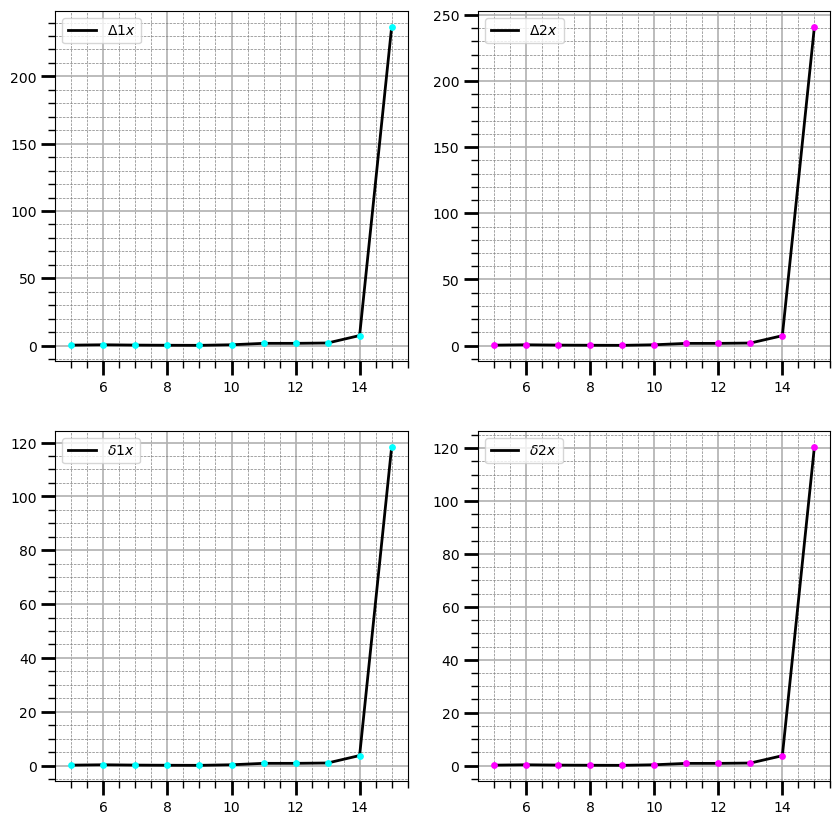

In [11]:
def AbsErr(x_,x):
    return np.linalg.norm(x - x_,np.inf)
def RelErr(x_,x):
    return AbsErr(x_,x)/np.linalg.norm(x,np.inf)

def AbsErr1(n,f):
    #задаем матрицу размером n
    A = np.array([[(np.sin(i+1))**(20-j) for j in range(n) ] for i in range(n)])
    x=np.array([2.0]*n)
    Bvec=A @ x
    
    #вносим возмущение
    A_=np.copy(A)
    A_[3,4]+=1e-3
    
    #поиск вектора решений методом f
    x_=f(A_,Bvec)

    return AbsErr(x_,x)

def RelErr1(n,f):
    #задаем матрицу размером n
    A = np.array([[(np.sin(i+1))**(20-j) for j in range(n) ] for i in range(n)])
    x=np.array([2.0]*n)
    Bvec=A @ x
    
    #вносим возмущение
    A_=np.copy(A)
    A_[3,4]+=1e-3
    
    #поиск вектора решений методом f
    x_=f(A_,Bvec)
    
    return RelErr(x_,x)


sizes = np.array([i+5 for i in range(11)])

#делаем график
fig,axs = plt.subplots(2,2,figsize=(10, 10))

#рисуем на графике F
axs[0][0].scatter(sizes,np.array([AbsErr1(i,LU_solve1) for i in sizes]),15, color = "cyan", zorder = 10)
axs[0][0].plot(sizes,np.array([AbsErr1(i,LU_solve1) for i in sizes]), label = f'$\Delta1 x$', color = "black", linewidth=2, zorder = 5)

#
axs[0][1].scatter(sizes, np.array([AbsErr1(i,LU_solve2) for i in sizes]),15, color = "magenta", zorder = 10)
axs[0][1].plot(sizes, np.array([AbsErr1(i,LU_solve2) for i in sizes]), label = f'$\Delta2 x$', color = "black", linewidth=2, zorder = 5)

#
axs[1][0].scatter(sizes,np.array([RelErr1(i,LU_solve1) for i in sizes]),15, color = "cyan", zorder = 10)
axs[1][0].plot(sizes, np.array([RelErr1(i,LU_solve1) for i in sizes]), label = f'$\delta1 x$', color = "black", linewidth=2, zorder = 5)

#
axs[1][1].scatter(sizes, np.array([RelErr1(i,LU_solve2) for i in sizes]),15, color = "magenta", zorder = 10)
axs[1][1].plot(sizes, np.array([RelErr1(i,LU_solve2) for i in sizes]), label = f'$\delta2 x$', color = "black", linewidth=2, zorder = 5)

for i in range (2):
    for j in range (2):
        axs[i][j].grid(which="major", linewidth=1.2)
        axs[i][j].grid(which="minor", linestyle="--", color="gray", linewidth=0.5)
        axs[i][j].tick_params(which='major', length=10, width=2)
        axs[i][j].tick_params(which='minor', length=5, width=1)
        axs[i][j].xaxis.set_minor_locator(AutoMinorLocator())
        axs[i][j].yaxis.set_minor_locator(AutoMinorLocator())
        axs[i][j].legend()
        #axs[i][j].set_xlim(5,15)
        #axs[i][j].set_ylim(0,10)



In [12]:
A = np.array([[(np.sin(i+1))**(20-j) for j in range(15) ] for i in range(15)])
Xvec=np.array([2.0]*15)
Bvec=A @ Xvec

A_=np.copy(A)
A_[3,4]+=1e-3


print("\n")
print("вектор B")
print(Bvec)

print("\n")
print("Метод 1")
x_1=LU_solve1(A_,Bvec)
print(x_1)


print("\n")
print("Метод 2")
x_2=LU_solve2(A_,Bvec)
print(x_2)

#print("\n")
#print("разность векторов решений")
#dx=Xvec-x_
#print(dx)

print("\n")
print("Число обусловленности А")
print(np.linalg.cond(A,1))
print("\n")
print("Абсолютная погрешность А_")
print(AbsErr(A_,A))
print("\n")
print("Относительная погрешность A_")
print(RelErr(A_,A))
print("\n")
print("Абсолютная погрешность Х_")
print(AbsErr(x_1,Xvec))
print("Оценка абс погрешности x_")
est1=np.linalg.norm(np.linalg.inv(A),1) * AbsErr(A_,A)
print(est1)
print("\n")
print("Относительная погрешность Х_")
print(RelErr(x_1,Xvec))
print("Оценка отн погрешности x_")
est2=np.linalg.cond(A,1)*RelErr(A_,A)
print(est2)





вектор B
[4.142429914689053e+00 9.469787984245116e+00 1.839200454035520e-05
 2.171688247262232e-01 1.216951893766910e+00 7.439116123083028e-04
 4.680161508618886e-01 2.613254097255667e+01 1.666756013997601e-02
 3.358290557950761e-02 1.999745390650392e+00 3.106615662557799e-02
 1.897832968141017e-02 2.655842472650075e+01 4.317870422240803e-01]


Метод 1
[  41.56446134738232  -104.54220692288384     1.081256374531507
  238.58810378221744  -163.2469784909943   -145.96648496833993
  191.783652504708       4.916640642223337  -70.69852638539955
   21.273244984768347   11.611812110383632   -2.51022383894076
    1.928685943965493    2.240820801218666    1.975765075872017]


Метод 2
[  42.253482334532976 -106.38209762499572     1.038207243209267
  242.68304229316118  -166.05821414247575  -148.544102720737
  195.03290099366365     4.985978892775922  -71.9462401956341
   21.599225378790283   11.777248045565884   -2.587072438157439
    1.927382755462489    2.244930885910468    1.975352461515565]

# Задача 3.3

In [13]:
m = 35
beta = m*(66-2+5)
A = np.array([[np.cos(i+j)/(0.1*beta) + 0.1*beta*np.exp(-((i-j)**2)) for j in range (m)] for i in range (m)])


def method_ns(A,b,eps):
    #начальное приближение и норма вектор невязки
    xn=np.zeros(m)
    r0 = np.linalg.norm((A @ xn) - b,np.inf) 
    cur_norm_r = r0
    
    while((cur_norm_r/r0 > eps)):
        fl = False
        #вектор невязки
        rn = (A @ xn) - b
        #его норма
        cur_norm_r = np.linalg.norm(rn,np.inf)
        #парметр метода и следующий x
        t = (rn @ rn)/(A @ rn @ rn)
        #если точности достаточно, x не меняется
        xn = (xn-t*rn) if cur_norm_r/r0 > eps else xn
        
    return xn

vX = np.array([2.0]*m)
vB = A @ vX
method_ns(A,vB,0.000001)
    

array([1.999997395661689, 2.000005013015121, 1.999993477426849,
       2.000007484701907, 1.999993006782224, 2.000006770169615,
       1.999995200195597, 2.000004521053638, 1.99999796112069 ,
       2.000002552950807, 1.999999877339232, 2.000001533112845,
       2.000000776696063, 2.00000120813394 , 2.000001078595143,
       2.000001158714309, 2.000001151938026, 2.000001160488096,
       2.000001151919473, 2.000001158695007, 2.000001078592573,
       2.00000120815553 , 2.000000776715219, 2.000001533135347,
       1.999999877307655, 2.000002552973935, 1.999997961057871,
       2.000004521161566, 1.999995200108075, 2.000006770330146,
       1.999993006619137, 2.000007484839601, 1.999993477275703,
       2.000005013118043, 1.999997395639818])

# Задача 3.2

In [19]:
#порядок
n = 32 
#коэф. для главной диагонали
d = 35.0
#коэф. для побочной диагонали
pd = 22.0
#коэф. для 12ого столбца
col_11 = 35.0

#построение вектора B, по заданным корням
def vectorB(n,d,pd,col_11,x):
    b=np.zeros(n)
    for i in range (n):
        if (i!=11):
            b[i] = d*x[i]+pd*x[n-i-1]+col_11*x[11] if i!=20 else d*x[i]+pd*x[n-i-1]
        else:
            b[i] = d*x[i]+pd*x[n-i-1]
    return b

#решение системы
def Solution(b,n):
    x = np.zeros(n)
    x[11] = (35*b[11]-22*b[20])/741
    x[20] = (35*b[20]-22*b[11])/741
    for i in range (round(n/2)):
        if (i!=11):
            x[i] = (35*b[i]-22*b[n-1-i]-455*x[11])/741 
            x[n-i-1] = (35*b[n-1-i]-22*b[i]-455*x[11])/741 
    return x

xtest=np.array([2.0]*n)
btest=vectorB(n,d,pd,col_11,xtest)
print("Корни тестового примера")
print(xtest)
print("Вектор В тестового примера")
print(btest)

print("Решение тестового примера")
print(Solution(btest,n))

bvec = np.array([i**3-(2.0*i)**0.5 for i in range (n)])

print("Решение заданного варианта")
x_=Solution(bvec,n)
print(x_)

check=vectorB(n,d,pd,col_11,x_)
print("Вектор, построенный на найденном решении")
print(check)
print("Исходный вектор")
print(bvec)

Корни тестового примера
[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2.]
Вектор В тестового примера
[184. 184. 184. 184. 184. 184. 184. 184. 184. 184. 184. 114. 184. 184.
 184. 184. 184. 184. 184. 184. 114. 184. 184. 184. 184. 184. 184. 184.
 184. 184. 184. 184.]
Решение тестового примера
[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2.]
Решение заданного варианта
[-776.9879286506349   -694.1475971805651   -616.3289288731711
 -543.1030803229798   -474.01162203737     -408.5942223553767
 -346.38996405940276  -286.93767994712505  -229.77607563255052
 -174.44378439490183  -120.47939509636804  -174.6828938387941
  -14.808543154221596   37.82085157041236    90.92819844340536
  144.97498595818263   200.42270682937948   257.73285619165796
  317.36692999453487   379.7864234213628    338.19140311808945
  514.8276353079852    588.3723226132835    666.5483605225937
  749.8172011418362    838.6402693